Path: /home/thjo/Datasets/autoSchenk/20230609_161829_0.jpg
img0: (1920, 1440, 3)
img: torch.Size([1, 3, 416, 416])
[[          0     0.49132     0.56979     0.97986     0.69062]
 [          1     0.46944      0.4849     0.24028    0.070833]]


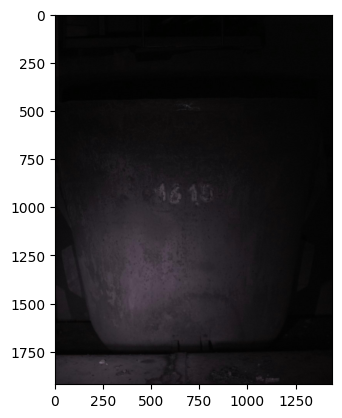

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ultralytics.yolo.utils.ops import xywh2xyxy, xyxy2xywh
from tools.boliden_utils import get_cut_out
from tools.StreamLoader import LoadImages
from PIL import Image
path = "/home/thjo/Datasets/autoSchenk/20230609_161829_0.jpg"
loader = LoadImages(path, imgsz=416)
path, img0, img, _ = next(iter(loader))
path = path[0]
print(f"Path: {path}")
print(f"img0: {img0.shape}")
print(f"img: {img.shape}")
label_path = path.replace(".jpg", ".txt").replace(".png", ".txt")
labels = np.loadtxt(label_path, delimiter=" ", dtype=np.float32).reshape(-1, 5)
print(labels)
plt.imshow(img0)

In [1]:
from tools.verify_predictions import DataSplitter
import os

In [6]:

files = os.listdir("/home/thjo/Datasets/autoSchenk/")
for file in files:
    if file.startswith("_") or file.startswith("."):
        os.remove(os.path.join("/home/thjo/Datasets/autoSchenk/", file))

In [4]:
import os
import shutil

source_directories = ["train", "val", "test"]
destination_directory = os.path.join("/home/thjo/Datasets/BolidenSchenk/", "all")
os.makedirs(destination_directory, exist_ok=True)
for directory in source_directories:
    directory = os.path.join("/home/thjo/Datasets/BolidenSchenk/", directory)
    files = os.listdir(directory)
    for file in files:
        source = os.path.join(directory, file)
        destination = os.path.join(destination_directory, file)
        shutil.move(source, destination)

In [15]:
import os
import re

directory = "/home/thjo/Datasets/BolidenSchenk/train/"  # Replace with the actual directory path

files = os.listdir(directory)
for file in files:
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)

    # Extract numeric parts from the base name using regular expressions
    numeric_parts = re.findall(r'[\d-]+', base_name)
    new_file_path = "item_"+''.join(numeric_parts) + extension
    # print(new_file_path)
    os.rename(file_path, os.path.join(directory, new_file_path))
# Check if all file image files have a corresponding label file
for file in files:
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)
    if extension not in [".jpg", ".png"]:
        continue

    label_path = base_name + ".txt"
    # print(label_path)
    if not os.path.exists(label_path):
        print(f"Label file {label_path} does not exist!")

Label file /home/thjo/Datasets/BolidenSchenk/train/item_1231_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_3146_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_1718_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_3331_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_81_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_2470_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_2577_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_274_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_1278_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_685_epitaxial.txt does not exist!
Label file /home/thjo/Datasets/BolidenSchenk/train/item_1905_epitaxial.txt does not exist!
Lab

In [10]:
import os

directory = "/home/thjo/Datasets/BolidenSchenk/all/"  # Replace with the actual directory path

files = os.listdir(directory)
for index, file in enumerate(files):
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)
    if extension not in [".jpg", ".png"]:
        continue

    label_path = base_name + ".txt"
    if not os.path.exists(label_path):
        print(f"Label file {label_path} does not exist!")
        continue

    new_base_name = f"item_{index + 1}"
    new_file_path = os.path.join(directory, new_base_name + extension)
    new_label_path = os.path.join(directory, new_base_name + ".txt")

    os.rename(file_path, new_file_path)
    os.rename(label_path, new_label_path)


In [11]:
files = os.listdir(directory)
for file in files:
    file_path = os.path.join(directory, file)
    base_name, extension = os.path.splitext(file_path)
    if extension not in [".jpg", ".png"]:
        continue

    label_path = base_name + ".txt"
    # print(label_path)
    if not os.path.exists(label_path):
        print(f"Label file {label_path} does not exist!")

In [1]:
from tools.extract_labels import LabelExtractor
input_folder = "/home/thjo/Datasets/BolidenSchenk/test/"
output_folder = "./test_folder/"
classes_to_extract = [1]
LE = LabelExtractor(input_folder,output_folder,classes_to_extract)
LE.extract_labels()

WARNING ⚠️ user config directory is not writeable, defaulting to '/tmp/Ultralytics'.


1.0 [0.090625, 0.6105293, 0.18125, 0.07967046]
1.0 [0.47600695, 0.33677083, 0.34618056, 0.08229167]
